In [1]:
import spotipy.util as util
import spotipy
from numpy import array
from sklearn.preprocessing import LabelEncoder
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import plotly
import plotly.express as px
from plotly.offline import plot

sns.set(style = 'white',context= 'notebook', rc = {'figure.figsize':(14,10)})

In [2]:
plotly.offline.init_notebook_mode(connected=True)

In [3]:
import ast
from typing import List
from os import listdir
def get_streamings(path: str = 'Spotify Data') -> List[dict]:
    
    files = ['Spotify Data/' + x for x in listdir(path)
             if x.split('.')[0][:-1] == 'StreamingHistory']
    
    all_streamings = []
    
    for file in files: 
        with open(file, 'r', encoding='UTF-8') as f:
            new_streamings = ast.literal_eval(f.read())
            all_streamings += [streaming for streaming 
                               in new_streamings]
    return all_streamings

In [4]:
username = '9cjfei8bx9vq78vel4odrjd3y'
client_id ='f2018fb393c2424dba2844c31e8e2c18'
client_secret = 'f4bb9567dafc4625877be647542fd919'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played user-top-read playlist-read-private user-library-read user-follow-read'

token = util.prompt_for_user_token(username=username, 
scope=scope, 
client_id=client_id,   
client_secret=client_secret,     
redirect_uri=redirect_uri)

In [5]:
import requests
def get_id(track_name: str, token: str) -> str:
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
    params = [
    ('q', track_name),
    ('type', 'track'),
    ]
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
    except:
        return None

In [6]:
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        features = sp.audio_features([track_id])
        return features[0]
    except:
        return None

In [7]:
streamings = df = pd.read_pickle('Created_Features\Jazz.pkl')

res = [i for i in streamings if i['msPlayed'] >60000]
df = pd.DataFrame(res)
df

,endTime,artistName,trackName,msPlayed
0,2019-07-02 04:37,Maroon 5,Girls Like You,215229
1,2019-07-02 04:53,Maroon 5,Wait,190642
2,2019-07-02 04:58,Fall Out Boy,The Last Of The Real Ones,230400
3,2019-07-02 05:02,Fort Minor,Remember the Name (feat. Styles of Beyond),230493
4,2019-07-02 05:06,Fall Out Boy,Fourth Of July,224360
...,...,...,...,...
4683,2020-07-02 16:18,Van Halen,Eruption - 2015 Remaster,102080
4684,2020-07-02 16:21,Guns N' Roses,November Rain,142689
4685,2020-07-02 16:25,Lynyrd Skynyrd,Free Bird,234099
4686,2020-07-02 16:26,Pink Floyd,Comfortably Numb,94231


In [8]:
df = df.sort_values(by=['msPlayed'],ascending = False)
df = df.drop_duplicates("trackName", keep = 'first')
df = df.reset_index(drop = True)
df

,endTime,artistName,trackName,msPlayed
0,2019-12-02 14:54,Kumar Gandharva,Runanubandhachya,737531
1,2019-12-31 21:47,Miles Davis,All Blues,692745
2,2020-05-04 05:45,The Weeknd,In Your Eyes,621062
3,2019-10-01 04:17,Lynyrd Skynyrd,Free Bird,614118
4,2019-12-31 22:05,Miles Davis,So What,562620
...,...,...,...,...
927,2019-11-09 18:19,Franz Schubert,"Schwanengesang, D. 957: 4. Ständchen In D Mino...",61606
928,2020-03-02 13:40,Sleepermane,Frosty,61533
929,2020-03-11 15:22,Rajstar,Shh,60778
930,2019-09-29 17:57,Lata Mangeshkar,"Tum Aa Gaye Ho Noor Aa Gaya (From ""Aandhi"")",60595


In [9]:
df1= df['endTime'].str.split("-",n=1,expand = True)
df['endTime'] = df1[0]
df = df[df['endTime']=='2020']


In [10]:
df = df.reset_index(drop = True)

In [11]:
unique_tracks = list(set(df['trackName']))
len(unique_tracks)

403

In [12]:
#Get All features for the top tracks
all_features = {}
for track in unique_tracks:
    track_id = get_id(track, token)
    features = get_features(track_id, token)
    if features:
        all_features[track] = features

In [13]:
all1 = pd.DataFrame(all_features)
all2 = all1.transpose()
all2 = all2.reset_index()
all2 = all2.rename(columns={'index':'trackName'})
all2

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Umbrella,0.583,0.829,1,-4.603,1,0.134,0.00864,0,0.0426,0.575,174.028,audio_features,49FYlytm3dAAraYgpoJZux,spotify:track:49FYlytm3dAAraYgpoJZux,https://api.spotify.com/v1/tracks/49FYlytm3dAA...,https://api.spotify.com/v1/audio-analysis/49FY...,275987,4
1,Thnks fr th Mmrs,0.459,0.891,10,-5.057,0,0.0623,0.00511,0,0.106,0.588,154.837,audio_features,3Zwu2K0Qa5sT6teCCHPShP,spotify:track:3Zwu2K0Qa5sT6teCCHPShP,https://api.spotify.com/v1/tracks/3Zwu2K0Qa5sT...,https://api.spotify.com/v1/audio-analysis/3Zwu...,203507,4
2,Victorious,0.57,0.865,8,-4.518,1,0.0472,0.00205,0,0.404,0.691,110.01,audio_features,6od5hFv9IT5JHc7NEF9HRv,spotify:track:6od5hFv9IT5JHc7NEF9HRv,https://api.spotify.com/v1/tracks/6od5hFv9IT5J...,https://api.spotify.com/v1/audio-analysis/6od5...,178600,4
3,Minority,0.551,0.965,0,-2.772,1,0.0452,0.00576,0,0.171,0.708,137.841,audio_features,4qjfQnccStTR8zNsb6Mizo,spotify:track:4qjfQnccStTR8zNsb6Mizo,https://api.spotify.com/v1/tracks/4qjfQnccStTR...,https://api.spotify.com/v1/audio-analysis/4qjf...,168227,4
4,Until I Bleed Out,0.245,0.394,0,-9.887,0,0.0374,0.423,2.9e-05,0.093,0.148,115.233,audio_features,2BcnxwxBuar5wjCaLqm5N3,spotify:track:2BcnxwxBuar5wjCaLqm5N3,https://api.spotify.com/v1/tracks/2BcnxwxBuar5...,https://api.spotify.com/v1/audio-analysis/2Bcn...,190173,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Black And White,0.443,0.582,2,-6.02,1,0.0482,0.0301,0,0.127,0.239,147.589,audio_features,7rpNuuoMbid56XkDsx2FjE,spotify:track:7rpNuuoMbid56XkDsx2FjE,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090,4
394,You're All I Want,0.439,0.469,5,-10.949,1,0.0244,0.365,0.812,0.113,0.276,90.985,audio_features,4nvLuqwTOZdEJI1fcHXv8h,spotify:track:4nvLuqwTOZdEJI1fcHXv8h,https://api.spotify.com/v1/tracks/4nvLuqwTOZdE...,https://api.spotify.com/v1/audio-analysis/4nvL...,264453,4
395,Gold on the Ceiling,0.505,0.833,0,-4.632,1,0.0475,0.00772,7.9e-05,0.069,0.565,130.121,audio_features,5lN1EH25gdiqT1SFALMAq1,spotify:track:5lN1EH25gdiqT1SFALMAq1,https://api.spotify.com/v1/tracks/5lN1EH25gdiq...,https://api.spotify.com/v1/audio-analysis/5lN1...,224333,4
396,Lying Is the Most Fun a Girl Can Have Without ...,0.66,0.799,8,-4.644,1,0.0995,0.106,0,0.154,0.475,125.966,audio_features,7wOmQJeVX6qjNXqqsKOkPx,spotify:track:7wOmQJeVX6qjNXqqsKOkPx,https://api.spotify.com/v1/tracks/7wOmQJeVX6qj...,https://api.spotify.com/v1/audio-analysis/7wOm...,200227,4


In [14]:
merged = pd.merge(all2,df,how ='inner',left_on = 'trackName', right_on ='trackName')
merged

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,endTime,artistName,msPlayed
0,Umbrella,0.583,0.829,1,-4.603,1,0.134,0.00864,0,0.0426,...,audio_features,49FYlytm3dAAraYgpoJZux,spotify:track:49FYlytm3dAAraYgpoJZux,https://api.spotify.com/v1/tracks/49FYlytm3dAA...,https://api.spotify.com/v1/audio-analysis/49FY...,275987,4,2020,Rihanna,507016
1,Thnks fr th Mmrs,0.459,0.891,10,-5.057,0,0.0623,0.00511,0,0.106,...,audio_features,3Zwu2K0Qa5sT6teCCHPShP,spotify:track:3Zwu2K0Qa5sT6teCCHPShP,https://api.spotify.com/v1/tracks/3Zwu2K0Qa5sT...,https://api.spotify.com/v1/audio-analysis/3Zwu...,203507,4,2020,Fall Out Boy,203506
2,Victorious,0.57,0.865,8,-4.518,1,0.0472,0.00205,0,0.404,...,audio_features,6od5hFv9IT5JHc7NEF9HRv,spotify:track:6od5hFv9IT5JHc7NEF9HRv,https://api.spotify.com/v1/tracks/6od5hFv9IT5J...,https://api.spotify.com/v1/audio-analysis/6od5...,178600,4,2020,Panic! At The Disco,178600
3,Minority,0.551,0.965,0,-2.772,1,0.0452,0.00576,0,0.171,...,audio_features,4qjfQnccStTR8zNsb6Mizo,spotify:track:4qjfQnccStTR8zNsb6Mizo,https://api.spotify.com/v1/tracks/4qjfQnccStTR...,https://api.spotify.com/v1/audio-analysis/4qjf...,168227,4,2020,Green Day,162822
4,Until I Bleed Out,0.245,0.394,0,-9.887,0,0.0374,0.423,2.9e-05,0.093,...,audio_features,2BcnxwxBuar5wjCaLqm5N3,spotify:track:2BcnxwxBuar5wjCaLqm5N3,https://api.spotify.com/v1/tracks/2BcnxwxBuar5...,https://api.spotify.com/v1/audio-analysis/2Bcn...,190173,3,2020,The Weeknd,179357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Black And White,0.443,0.582,2,-6.02,1,0.0482,0.0301,0,0.127,...,audio_features,7rpNuuoMbid56XkDsx2FjE,spotify:track:7rpNuuoMbid56XkDsx2FjE,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090,4,2020,Niall Horan,193089
394,You're All I Want,0.439,0.469,5,-10.949,1,0.0244,0.365,0.812,0.113,...,audio_features,4nvLuqwTOZdEJI1fcHXv8h,spotify:track:4nvLuqwTOZdEJI1fcHXv8h,https://api.spotify.com/v1/tracks/4nvLuqwTOZdE...,https://api.spotify.com/v1/audio-analysis/4nvL...,264453,4,2020,Cigarettes After Sex,154586
395,Gold on the Ceiling,0.505,0.833,0,-4.632,1,0.0475,0.00772,7.9e-05,0.069,...,audio_features,5lN1EH25gdiqT1SFALMAq1,spotify:track:5lN1EH25gdiqT1SFALMAq1,https://api.spotify.com/v1/tracks/5lN1EH25gdiq...,https://api.spotify.com/v1/audio-analysis/5lN1...,224333,4,2020,The Black Keys,102881
396,Lying Is the Most Fun a Girl Can Have Without ...,0.66,0.799,8,-4.644,1,0.0995,0.106,0,0.154,...,audio_features,7wOmQJeVX6qjNXqqsKOkPx,spotify:track:7wOmQJeVX6qjNXqqsKOkPx,https://api.spotify.com/v1/tracks/7wOmQJeVX6qj...,https://api.spotify.com/v1/audio-analysis/7wOm...,200227,4,2020,Panic! At The Disco,88503


In [15]:

le1 = LabelEncoder()
ie1= le1.fit_transform(array(merged['artistName']))
merged['code']= pd.DataFrame(ie1)
merged['code'] = merged['code'].astype('int')
merged['code'].unique()

array([154,  61, 143,  70, 187, 186,  43,  37, 133,  62,  85,  88, 217,
        98, 109,  53, 214, 177, 163,  47, 166,  77, 222, 110, 175, 127,
       149,  44,  83, 151, 122, 116,  71, 126, 119,  92, 179, 117,  22,
         8,  81,  24, 132,  64,  65,  96,  87, 189, 100,  15,  46, 105,
       111,  16,   2, 142, 125,  59, 181,  78, 191,  39,  45, 164, 204,
       195, 190, 162,  90, 124,   9, 221,  57, 205,   4,  55,  31,   3,
       136, 147,  80,  36, 152, 193, 157, 128, 172,  27, 135, 210, 153,
       115, 178, 161, 192, 180,  49, 112, 138, 199,  25, 174, 209,   7,
       148,  75, 146,  91, 165, 167, 169,  28, 218, 145,  93, 134,  79,
        38, 103,  40,  82,  56, 171, 196,  12,  94, 129, 202, 213,  58,
        60, 206, 131,  23,  17, 200,  21,  33,  32,  14, 101,  76, 107,
        34, 170,   1, 141,  67, 223, 155,  84, 144, 197,  10,  54,   5,
       212, 201,  52,  35,  11,  42,  30, 137, 188,  72,  13, 173,  26,
       198, 120, 130,  20, 118, 215,  48, 106, 139, 168,  51, 14

In [16]:
display(merged.iloc[3,:])


trackName                                                    Minority
danceability                                                    0.551
energy                                                          0.965
key                                                                 0
loudness                                                       -2.772
mode                                                                1
speechiness                                                    0.0452
acousticness                                                  0.00576
instrumentalness                                                    0
liveness                                                        0.171
valence                                                         0.708
tempo                                                         137.841
type                                                   audio_features
id                                             4qjfQnccStTR8zNsb6Mizo
uri                 

In [29]:

reducer = umap.UMAP(n_neighbors = 20)

prescale = merged.iloc[:,1:12].values #select only dimensional data
scaled= StandardScaler().fit_transform(prescale)
scaled.shape

(398, 11)

In [30]:
embedding = reducer.fit_transform(scaled)

In [32]:
embed_df = pd.DataFrame(embedding)
merged['X']=0
merged['Y']=0
merged.iloc[:,23] = embed_df.iloc[:,0]
merged.iloc[:,24] = embed_df.iloc[:,1]
merged

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_href,analysis_url,duration_ms,time_signature,endTime,artistName,msPlayed,code,X,Y
0,Umbrella,0.583,0.829,1,-4.603,1,0.134,0.00864,0,0.0426,...,https://api.spotify.com/v1/tracks/49FYlytm3dAA...,https://api.spotify.com/v1/audio-analysis/49FY...,275987,4,2020,Rihanna,507016,154,9.022719,6.648100
1,Thnks fr th Mmrs,0.459,0.891,10,-5.057,0,0.0623,0.00511,0,0.106,...,https://api.spotify.com/v1/tracks/3Zwu2K0Qa5sT...,https://api.spotify.com/v1/audio-analysis/3Zwu...,203507,4,2020,Fall Out Boy,203506,61,3.525424,5.051473
2,Victorious,0.57,0.865,8,-4.518,1,0.0472,0.00205,0,0.404,...,https://api.spotify.com/v1/tracks/6od5hFv9IT5J...,https://api.spotify.com/v1/audio-analysis/6od5...,178600,4,2020,Panic! At The Disco,178600,143,11.307363,3.784301
3,Minority,0.551,0.965,0,-2.772,1,0.0452,0.00576,0,0.171,...,https://api.spotify.com/v1/tracks/4qjfQnccStTR...,https://api.spotify.com/v1/audio-analysis/4qjf...,168227,4,2020,Green Day,162822,70,10.473837,5.363281
4,Until I Bleed Out,0.245,0.394,0,-9.887,0,0.0374,0.423,2.9e-05,0.093,...,https://api.spotify.com/v1/tracks/2BcnxwxBuar5...,https://api.spotify.com/v1/audio-analysis/2Bcn...,190173,3,2020,The Weeknd,179357,187,4.569621,5.273177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Black And White,0.443,0.582,2,-6.02,1,0.0482,0.0301,0,0.127,...,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090,4,2020,Niall Horan,193089,135,8.954543,6.122275
394,You're All I Want,0.439,0.469,5,-10.949,1,0.0244,0.365,0.812,0.113,...,https://api.spotify.com/v1/tracks/4nvLuqwTOZdE...,https://api.spotify.com/v1/audio-analysis/4nvL...,264453,4,2020,Cigarettes After Sex,154586,37,6.858513,3.091592
395,Gold on the Ceiling,0.505,0.833,0,-4.632,1,0.0475,0.00772,7.9e-05,0.069,...,https://api.spotify.com/v1/tracks/5lN1EH25gdiq...,https://api.spotify.com/v1/audio-analysis/5lN1...,224333,4,2020,The Black Keys,102881,176,9.970233,5.514824
396,Lying Is the Most Fun a Girl Can Have Without ...,0.66,0.799,8,-4.644,1,0.0995,0.106,0,0.154,...,https://api.spotify.com/v1/tracks/7wOmQJeVX6qj...,https://api.spotify.com/v1/audio-analysis/7wOm...,200227,4,2020,Panic! At The Disco,88503,143,10.119087,3.471600


In [33]:
fig = px.scatter(merged, x= 'X', y = "Y", color = 'artistName', hover_data=['trackName','artistName'])
plot(fig)

'temp-plot.html'

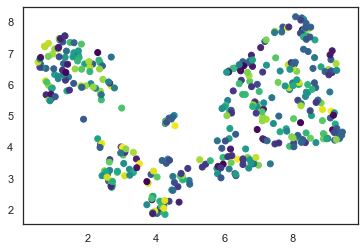

In [24]:
plt.scatter(
    merged.iloc[:, 23],
    merged.iloc[:, 24],
    c=merged['code'],
    cmap='viridis')
plt.show()

In [34]:
sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(scaled)

In [35]:
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

In [41]:
sph = merged 
sph['Z']=0
sph.iloc[:,23] = x
sph.iloc[:,24] = y
sph.iloc[:,25] = z

In [44]:
fig = px.scatter_3d(sph, x= 'X', y = "Y",z ='Z', color = 'artistName', hover_data=['trackName','artistName'])
plot(fig)

'temp-plot.html'